Este dataset contiene información médica relacionada con tumores de mama, clasificando si son benignos o malignos. Incluye varias características como tamaño del núcleo y textura.

# 1. Visualiza los datos con Pandas

In [51]:
import pandas as pd

df_orig = pd.read_csv("data.csv")
df_orig

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# 2. Identificamos la características de entrada y salida

In [52]:
# Creamos una copia para no modificar el dataSet original
df = df_orig.copy()

In [53]:
# X: datos de entrada (eliminamos la información no util 'id', 'diagnosis' que es la salida y 'Unnamed: 32' que es una columna vacía)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

# y será nuestra etiqueta de salida
y = df['diagnosis']

print("Tamaño de X (Entrada):", X.shape)
print("Tamaño de y (Salida):", y.shape)

Tamaño de X (Entrada): (569, 30)
Tamaño de y (Salida): (569,)


# 3. Crea una función que lea los ficheros y muestre formateado el Dataframe correspondiente con características y salida en Pandas.

In [54]:
def read_format():
    """
    Lee un archivo CSV y devuelve las características de entrada (X) 
    y la variable de salida (y) formateadas.
    """
    # X: datos de entrada (eliminamos la información no util 'id', 'diagnosis' que es la salida y 'Unnamed: 32' que es una columna vacía)
    X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
    
    # y: etiqueta de salida
    y = df['diagnosis']
    
    print("--- Características de Entrada (X) ---")
    print(X.head())
    
    print("\n--- Variable de Salida (y) ---")
    print(y.head())

read_format()

--- Características de Entrada (X) ---
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture

# 4. Muestra gráficamente la distribución de los atributos (Matplotlib)

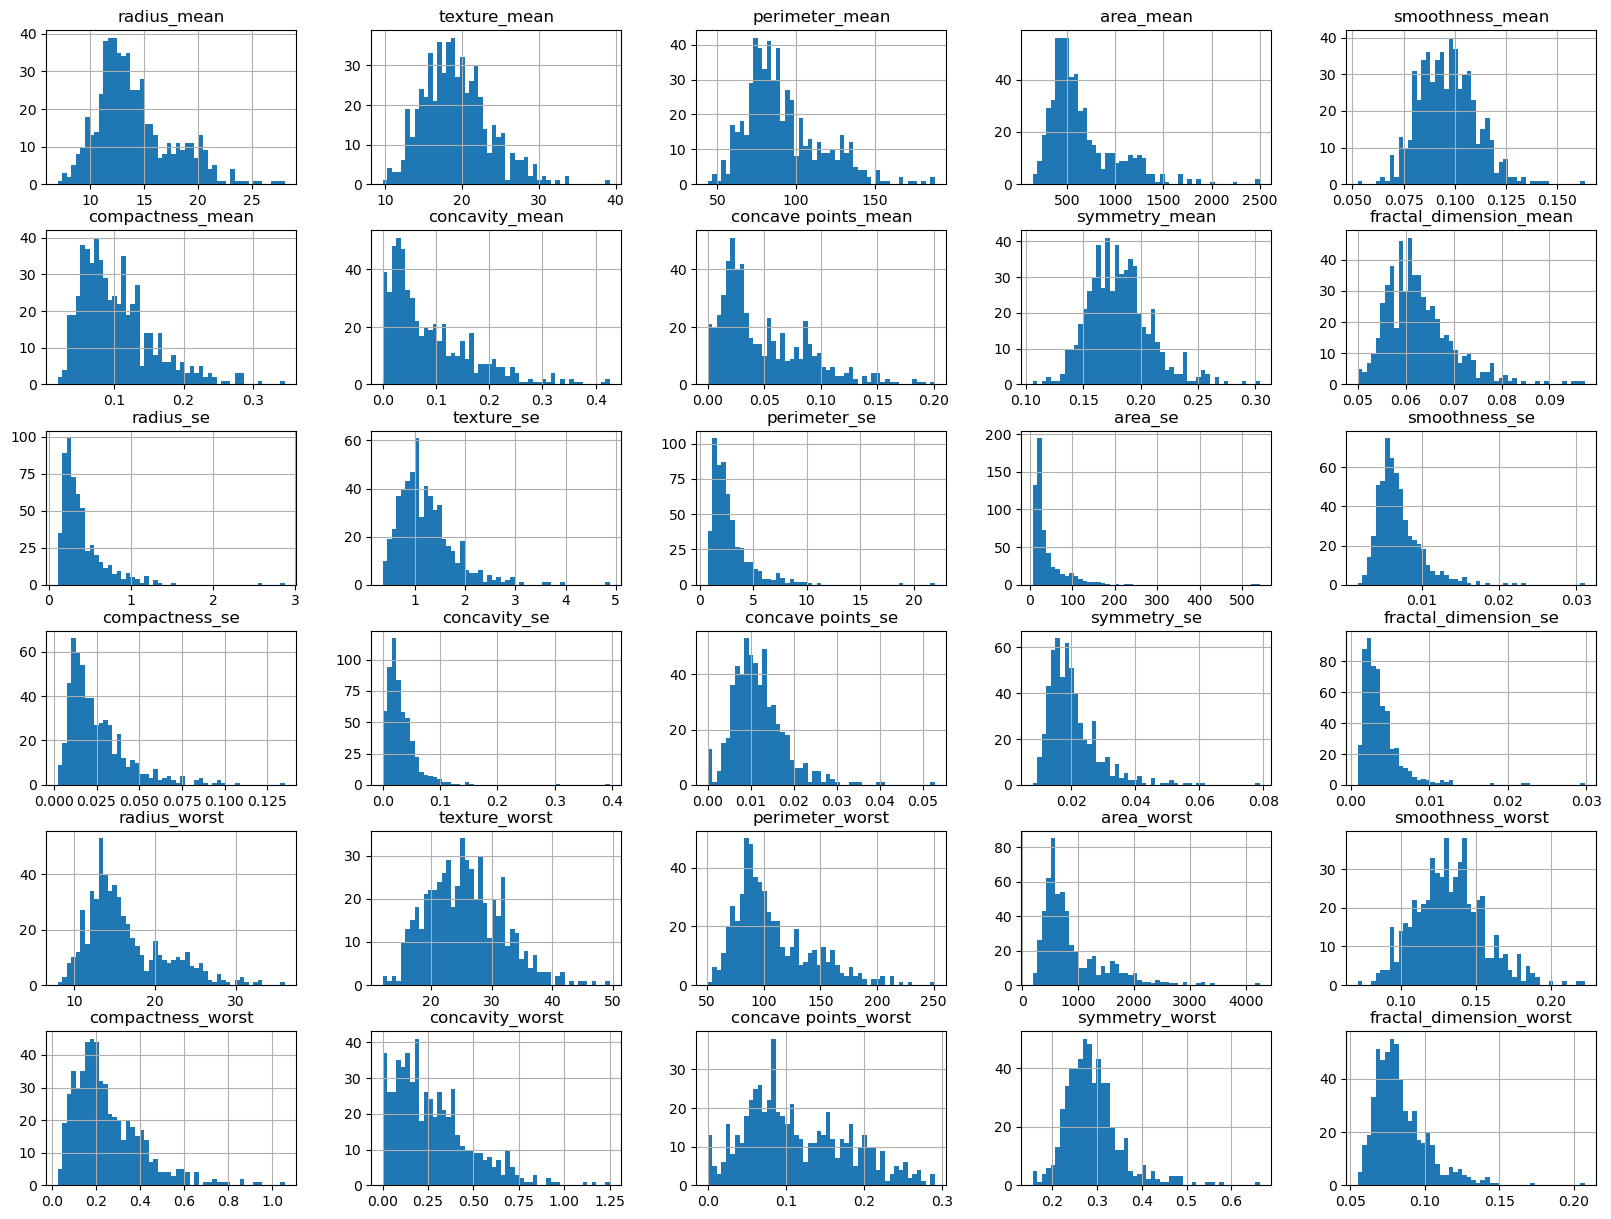

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

#Borramos las columnas insignificantes
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

X.hist(bins=50, figsize=(20,15))
plt.show()

# 5. Muestra la tabla de correlación con la clase

In [57]:
import pandas as pd

# Eliminamos las columnas que no dan informacion
df_droped = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# Creamos la variable objetivo
df_droped['diagnosis'] = df_droped['diagnosis'].map({'M': 1, 'B': 0})

# 4. Calcular la matriz de correlación
corr_matrix = df_droped.corr()

# 5. Mostrar la correlación con la clase 'diagnosis', ordenada
print(corr_matrix['diagnosis'].sort_values(ascending=False))

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

# 6. Muestra la correlación lineal entre todos los atributos

In [58]:
#En el ejercicio anterior he sacado la correlacion ya, solo cambiamos la forma de mostrarlo
print(corr_matrix)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

# 7. Identifica que atributos son importantes y cuáles redundantes.

En atributos *importantes* encontramos: concave points_worst, perimeter_worst, cradius_worst

En atributos *redundantes* encontramos radius_mean y perimeter_mean

# 8. Muestra gráficamente la matriz de correlación.

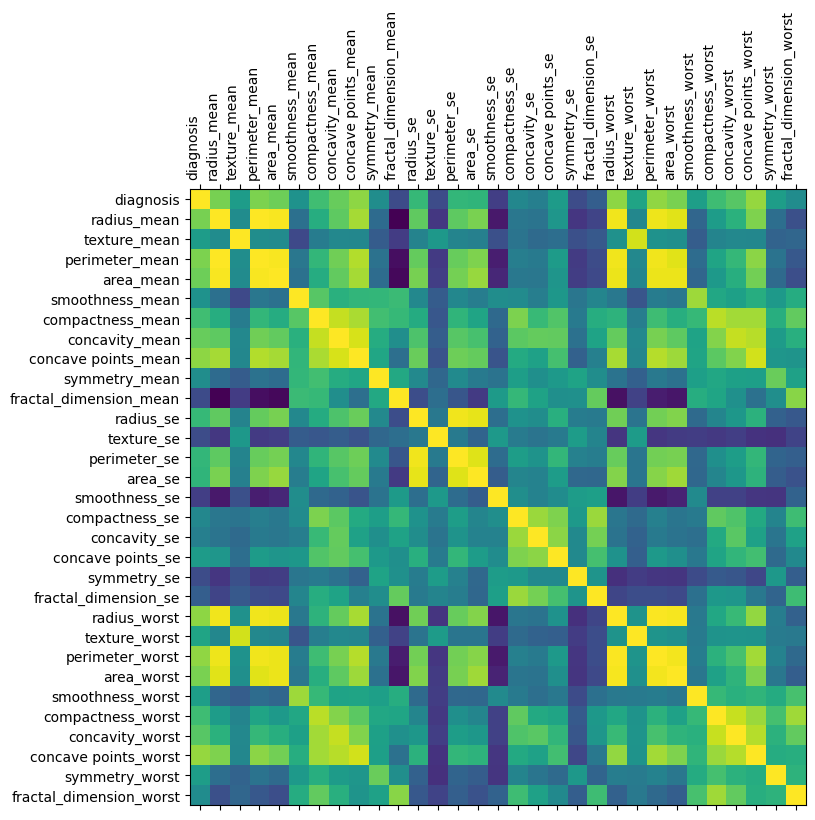

In [37]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.xticks(rotation=90, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

# 9. Dividir el conjunto de datos en Train, validation y test

In [59]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=42)

print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 341
Longitud del Validation Set: 114
Longitud del Test Set: 114
